In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np

In [5]:
from genesis_sim2real.envs.demo_holder import GenesisDemoHolder
demo_player = GenesisDemoHolder(use_eef=False, subsample_ratio=2)

/home/james/workspace/genesis_sim2real/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/james/workspace/genesis_sim2real/venv/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Loaded 96 demos from /home/james/workspace/genesis_sim2real/inthewild_trials
260 (880, 7) -- 250 (1675, 7) -- 290 (178, 7) -- 281 (520, 7) -- 309 (877, 7) -- 296 (1395, 7) -- 313 (747, 7) -- 266 (895, 7) -- 334 (572, 7) -- 252 (771, 7) -- 329 (709, 7) -- 298 (521, 7) -- 253 (597, 7) -- 299 (1306, 7) -- 335 (624, 7) -- 295 (3116, 7) -- 326 (483, 7) -- 304 (1040, 7) -- 278 (334, 7) -- 257 (504, 7) -- 236 (339, 7) -- 308 (677, 7) -- 234 (450, 7) -- 261 (706, 7) -- 282 (255, 7) -- 318 (759, 7) -- 286 (1876, 7) -- 284 (657, 7) -- 235 (442, 7) -- 269 (2428, 7) -- 244 (524, 7) -- 297 (569, 7) -- 333 (2035, 7) -- 307 (943, 7) -- 283 (660, 7) -- 301 (826, 7) -- 276 (730, 7) -- 316 (940, 7) -- 327 (687, 7) -- 245 (1662, 7) -- 233 (463, 7) -- 305 (631, 7) -- 321 (857, 7) -- 310 (917, 7) -- 328 (1383, 7) -- 254 (807, 7) -- 288 (1664, 7) -- 279 (1000, 7) -- 315 (1945, 7) -- 289 (301, 7) -- 302 (582, 7) -- 285 (418, 7) -- 246 (1311, 7) -- 242 (515, 7) -- 317 (723, 7) -- 239 (1378, 7) -- 240 (772, 7)

+0.3270, -1.4480, +2.3440, -1.3510, +2.2080, -1.5130, +0.4850 || +0.3270, -1.4480, +2.3440, -1.3510, +2.2080, -1.5130, +0.4850 || +0.3270, -1.4480, +2.3440, -1.3510, +2.2080, -1.5120, +0.4850 || +0.3270, -1.4480, +2.3440, -1.3510, +2.2080, -1.5110, +0.4850 || +0.3270, -1.4480, +2.3440, -1.3510, +2.2080, -1.5110, +0.4850 || +0.3270, -1.4480, +2.3440, -1.3510, +2.2080, -1.5110, +0.4850 || +0.3270, -1.4480, +2.3440, -1.3510, +2.2080, -1.5110, +0.4850 || +0.3270, -1.4480, +2.3440, -1.3510, +2.2080, -1.5110, +0.4850 || +0.3270, -1.4480, +2.3440, -1.3510, +2.2080, -1.5120, +0.4850 || +0.3270, -1.4480, +2.3440, -1.3510, +2.2080, -1.5140, +0.4850 || +0.3270, -1.4480, +2.3440, -1.3510, +2.2080, -1.5140, +0.4850 || +0.3270, -1.4480, +2.3440, -1.3510, +2.2080, -1.5140, +0.4850 || +0.3270, -1.4480, +2.3440, -1.3510, +2.2080, -1.5140, +0.4850 || +0.3270, -1.4480, +2.3440, -1.3510, +2.2080, -1.5140, +0.4850 || +0.3270, -1.4480, +2.3440, -1.3510, +2.2080, -1.5130, +0.4850 || +0.3270, -1.4480, +2.3440

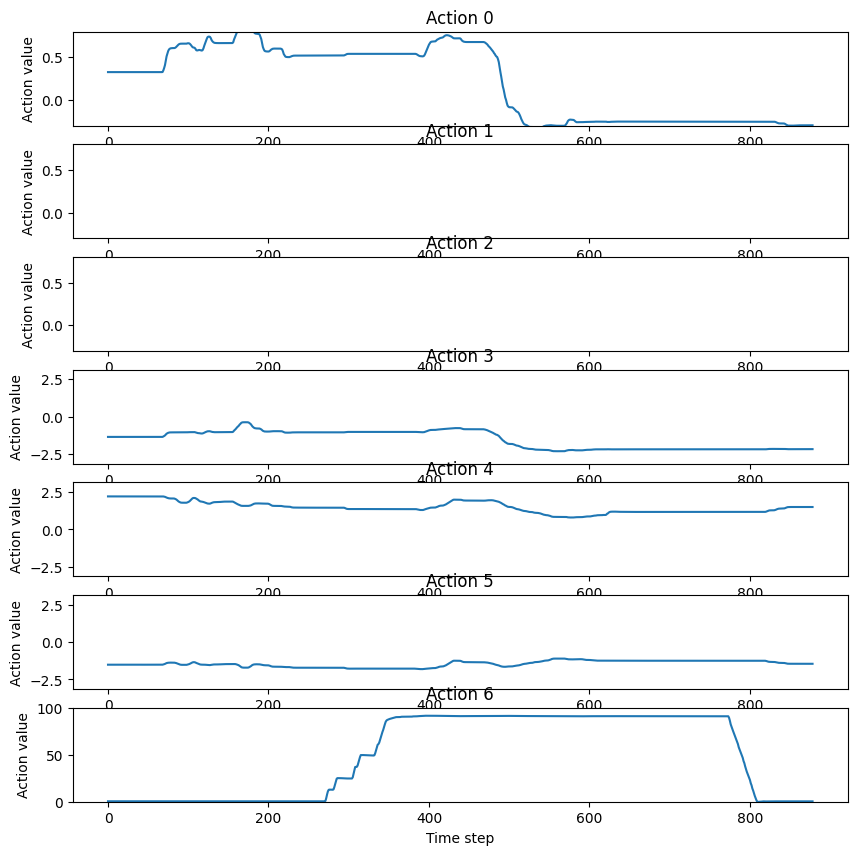

In [10]:
action = demo_player.next_action(normalize=False)
if action is not None:
    action = action['action']
else:
    demo_player.next_demo()
    action = demo_player.next_action(normalize=False)['action']

actions = []
while action is not None:
    actions.append(np.array(action))
    # round each dimension to the 3rd decimal place
    action = [round(x, 3) for x in action]
    print(', '.join([f'{x:+.4f}' for x in action]), end=' || ')
    action = demo_player.next_action(normalize=False)
    action = action['action'] if action is not None else None

# plot the actions 
import matplotlib.pyplot as plt
import numpy as np

npactions = np.array(actions)
fig, ax = plt.subplots(len(actions[0]), 1, figsize=(10, 10))
for i in range(len(actions[0])):
    ax[i].plot(npactions[:, i])
    ax[i].set_title(f'Action {i}')
    ax[i].set_xlabel('Time step')
    ax[i].set_ylabel('Action value')
    if i <= 2:
        ax[i].set_ylim(-0.3, 0.8)
    elif i == 6:
        ax[i].set_ylim(0, 100)
    else:
        ax[i].set_ylim(-np.pi, np.pi)

In [11]:
dactions = np.diff(npactions, axis=0)
print(dactions.shape, npactions.shape)

(878, 7) (879, 7)


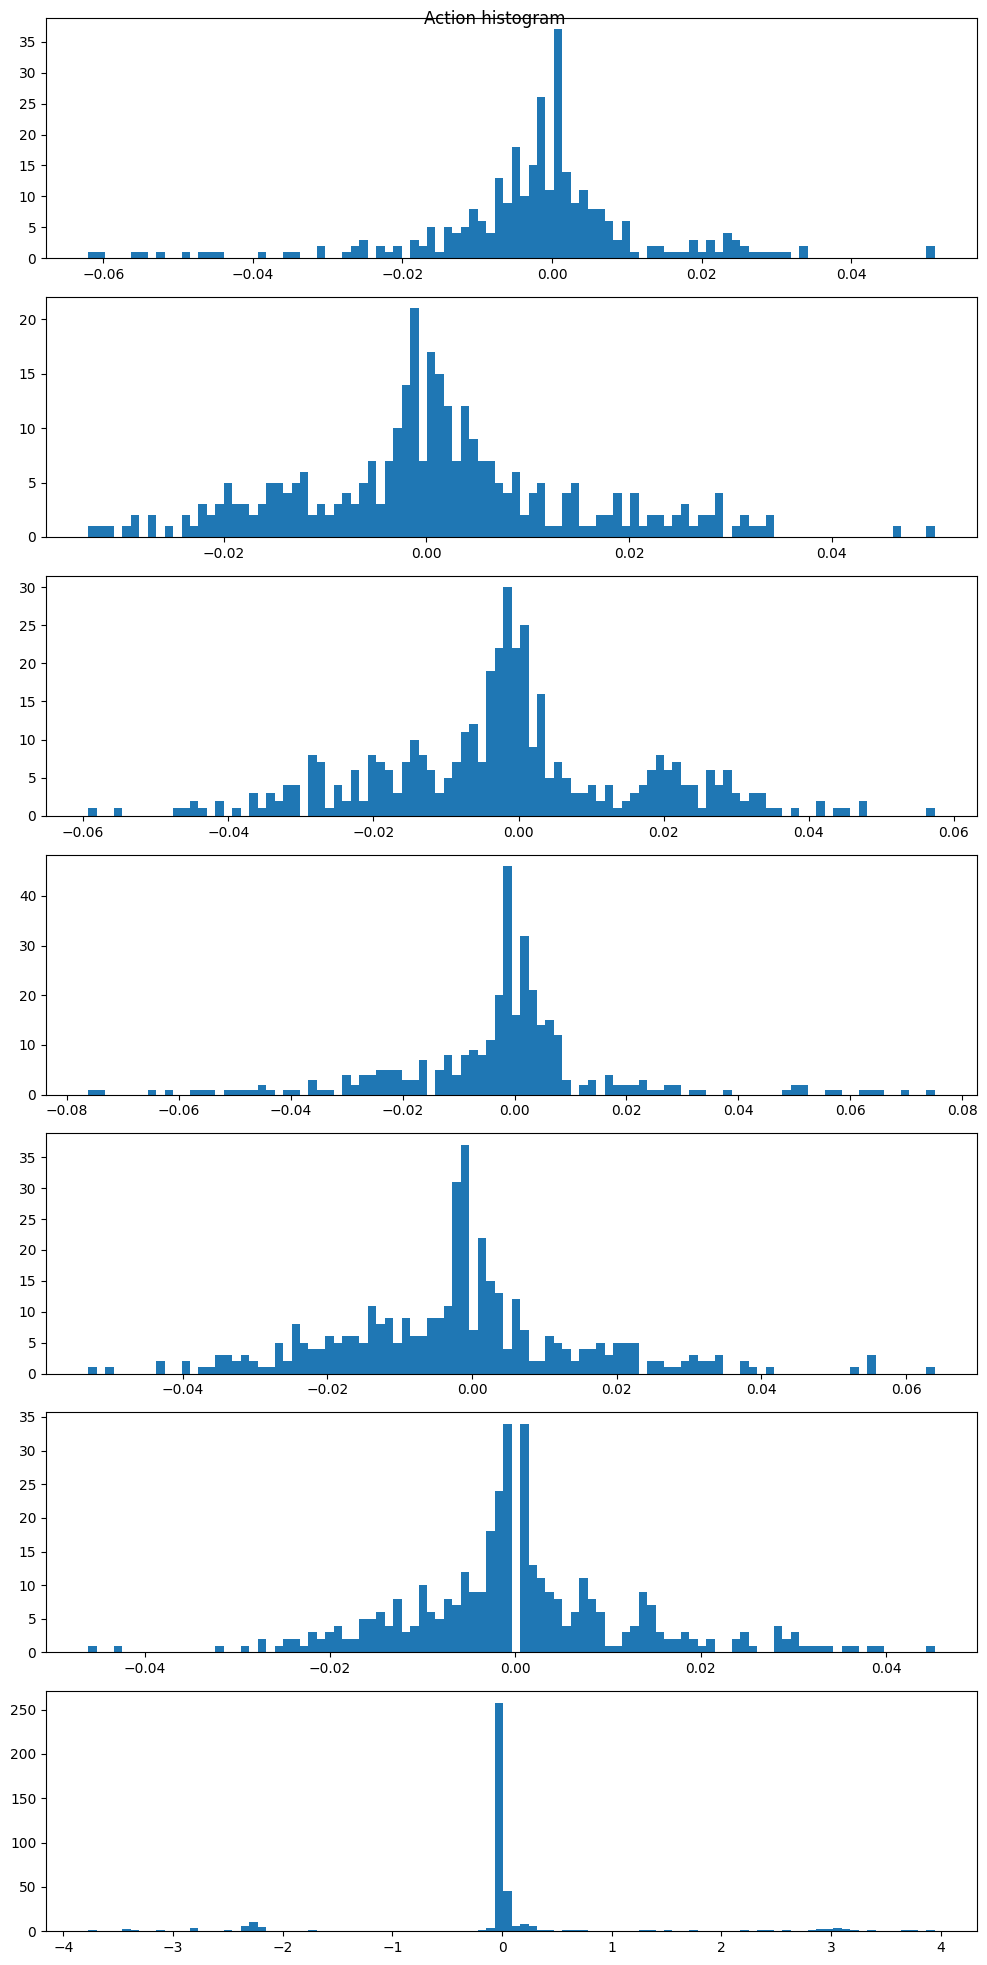

In [12]:
# make a histogram of the actions
fig, ax = plt.subplots(len(actions[0]), 1, figsize=(10, 20))
for i in range(len(actions[0])):

    da = dactions[:, i]

    # filter out abs(entry) < 0.001
    da = da[np.abs(da) > 0.0005]

    # filter out the 0s
    ax[i].hist(da, bins=100)
    # ax[i].set_title(f'Action {i} histogram')
    # ax[i].set_xlabel('Action value')
    # ax[i].set_ylabel('Frequency')
fig.suptitle('Action histogram')
plt.tight_layout()
plt.show()

In [13]:
import numpy as np

# Define Discrete Action Indices
ACTION_OPEN_GRIPPER = 0
ACTION_CLOSE_GRIPPER = 1
ACTION_MOVE_PX = 2
ACTION_MOVE_NX = 3
ACTION_MOVE_PY = 4
ACTION_MOVE_NY = 5
ACTION_MOVE_PZ = 6
ACTION_MOVE_NZ = 7
ACTION_NO_OP = 8

# Map indices to names for clarity (optional)
ACTION_NAMES = {
    ACTION_OPEN_GRIPPER: "Open Gripper",
    ACTION_CLOSE_GRIPPER: "Close Gripper",
    ACTION_MOVE_PX: "Move +X",
    ACTION_MOVE_NX: "Move -X",
    ACTION_MOVE_PY: "Move +Y",
    ACTION_MOVE_NY: "Move -Y",
    ACTION_MOVE_PZ: "Move +Z",
    ACTION_MOVE_NZ: "Move -Z",
    ACTION_NO_OP: "No-Op",
}

def discretize_single_action(continuous_action, gripper_threshold, movement_threshold):
    """
    Converts a single continuous 7-DOF action vector to a discrete action index.

    Args:
        continuous_action (np.ndarray): A 1D numpy array of shape (7,)
                                         representing [dx, dy, dz, droll, dpitch, dtheta, gripper].
        gripper_threshold (float): Threshold to detect significant gripper action.
                                   Assumes > threshold is open, < -threshold is close.
        movement_threshold (float): Minimum absolute value for dx, dy, or dz
                                    to be considered a movement action.

    Returns:
        int: The index of the corresponding discrete action.
    """
    if len(continuous_action) != 7:
        raise ValueError("Input action must have 7 dimensions.")

    dx, dy, dz = continuous_action[0:3]
    gripper = continuous_action[6]

    # --- Gripper Precedence ---
    if gripper > gripper_threshold:
        return ACTION_OPEN_GRIPPER
    elif gripper < -gripper_threshold:
        return ACTION_CLOSE_GRIPPER

    # --- Movement Handling (only if no gripper action) ---
    abs_dx, abs_dy, abs_dz = np.abs([dx, dy, dz])
    max_abs_move = max(abs_dx, abs_dy, abs_dz)

    if max_abs_move < movement_threshold:
        # Movement is below threshold -> No-Op
        return ACTION_NO_OP
    else:
        # Significant movement detected, find dominant axis
        # Handle ties by prioritizing X > Y > Z
        if abs_dx >= abs_dy and abs_dx >= abs_dz: # X is dominant (or tied)
            return ACTION_MOVE_PX if dx > 0 else ACTION_MOVE_NX
        elif abs_dy >= abs_dz: # Y is dominant (or tied with Z)
            return ACTION_MOVE_PY if dy > 0 else ACTION_MOVE_NY
        else: # Z is dominant
            return ACTION_MOVE_PZ if dz > 0 else ACTION_MOVE_NZ

def discretize_dataset(continuous_data, gripper_threshold=0.5, movement_threshold=0.01):
    """
    Converts a dataset of continuous actions to discrete action indices.

    Args:
        continuous_data (np.ndarray): An N x 7 numpy array where each row is a
                                      continuous action [dx, dy, dz, dr, dp, dt, grip].
        gripper_threshold (float): Threshold for gripper open/close detection.
        movement_threshold (float): Minimum magnitude for a movement component
                                    to be considered significant.

    Returns:
        np.ndarray: A 1D numpy array of shape (N,) containing the discrete action
                    index for each input continuous action.
    """
    if continuous_data.shape[1] != 7:
        raise ValueError("Input data must have 7 columns.")

    num_actions = continuous_data.shape[0]
    discrete_actions = np.zeros(num_actions, dtype=int)

    for i in range(num_actions):
        discrete_actions[i] = discretize_single_action(
            continuous_data[i],
            gripper_threshold,
            movement_threshold
        )

    return discrete_actions
